In [1]:
# Exercise: Guesstimating Beta Values for Logistic Regression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

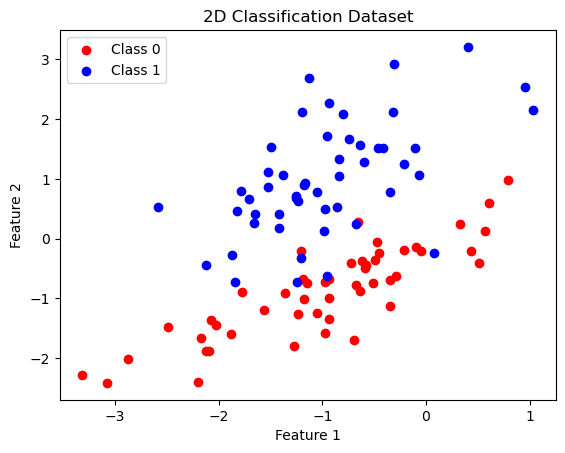

In [4]:
# Step 1: Create a simple 2D classification dataset
X, y = make_classification(
    n_samples=100, n_features=2, 
    n_redundant=0, n_informative=2, 
    n_clusters_per_class=1, random_state=20
)

# Plot the dataset
plt.scatter(X[y==0,0], X[y==0,1], color='red', label='Class 0')
plt.scatter(X[y==1,0], X[y==1,1], color='blue', label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title("2D Classification Dataset")
plt.show()

In [5]:
# Step 2: Define a sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [19]:
# Step 3: Guesstimate beta values (intercept and coefficients)
# Changing these values and will make probabilities change
beta_0 = -0.5   # intercept
beta_1 = -1.0   # coefficient for Feature 1
beta_2 = 2.0   # coefficient for Feature 2

# Compute linear combination z = beta0 + beta1*x1 + beta2*x2
z = beta_0 + beta_1*X[:,0] + beta_2*X[:,1]

# Compute predicted probabilities
prob = sigmoid(z)


In [20]:
# Step 4: Predict class based on 0.5 threshold
y_pred = (prob >= 0.5).astype(int)

# Accuracy of your guesstimated beta values
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy with guessed betas: {accuracy:.2f}")

Accuracy with guessed betas: 0.92


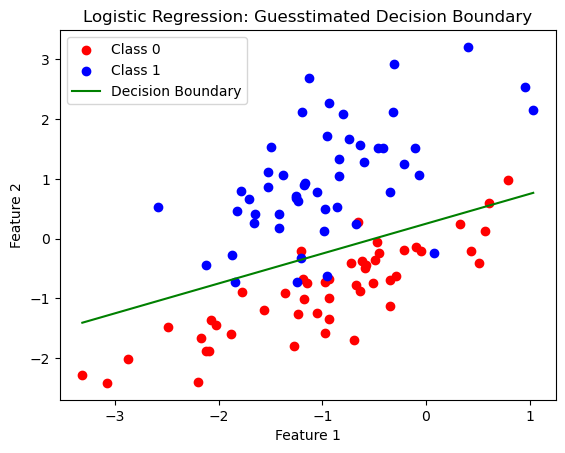

In [21]:
# Step 5: Visualize decision boundary
plt.scatter(X[y==0,0], X[y==0,1], color='red', label='Class 0')
plt.scatter(X[y==1,0], X[y==1,1], color='blue', label='Class 1')

# Decision boundary: beta0 + beta1*x1 + beta2*x2 = 0
# Solve for x2: x2 = -(beta0 + beta1*x1)/beta2
x1_vals = np.linspace(X[:,0].min(), X[:,0].max(), 100)
x2_vals = -(beta_0 + beta_1*x1_vals)/beta_2
plt.plot(x1_vals, x2_vals, color='green', label='Decision Boundary')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title("Logistic Regression: Guesstimated Decision Boundary")
plt.show()
